In [3]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [9]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_8_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:200000, :]
x_test = input_data[200000:205000, :]


(405000, 24)


In [10]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_8_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:200000, :]
y_test = output_data[200000:205000, :]
print(output_data.shape)

(405000, 12)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 200000 samples, validate on 5000 samples
Epoch 1/100
200000/200000 - 3s - loss: 0.2108 - accuracy: 0.9083 - val_loss: 0.1538 - val_accuracy: 0.9268
Epoch 2/100
200000/200000 - 3s - loss: 0.1215 - accuracy: 0.9451 - val_loss: 0.0994 - val_accuracy: 0.9571
Epoch 3/100
200000/200000 - 2s - loss: 0.0860 - accuracy: 0.9639 - val_loss: 0.0764 - val_accuracy: 0.9685
Epoch 4/100
200000/200000 - 3s - loss: 0.0675 - accuracy: 0.9724 - val_loss: 0.0619 - val_accuracy: 0.9748
Epoch 5/100
200000/200000 - 2s - loss: 0.0550 - accuracy: 0.9778 - val_loss: 0.0535 - val_accuracy: 0.9779
Epoch 6/100
200000/200000 - 2s - loss: 0.0459 - accuracy: 0.9816 - val_loss: 0.0439 - val_accuracy: 0.9824
Epoch 7/100
200000/200000 - 2s - loss: 0.0390 - accuracy: 0.9846 - val_loss: 0.0380 - val_accuracy: 0.9844
Epoch 8/100
200000/200000 - 2s - loss: 0.0331 - accuracy: 0.9871 - val_loss: 0.0319 - val_accuracy: 0.9874
Epoch 9/100
200000/200000 - 2s - loss: 0.0281 - accuracy: 0.9891 - val_loss: 0.0298 - val_accu

Epoch 77/100
200000/200000 - 2s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 78/100
200000/200000 - 2s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 79/100
200000/200000 - 2s - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0071 - val_accuracy: 0.9985
Epoch 80/100
200000/200000 - 2s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0052 - val_accuracy: 0.9987
Epoch 81/100
200000/200000 - 2s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 82/100
200000/200000 - 2s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 83/100
200000/200000 - 2s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 84/100
200000/200000 - 2s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 85/100
200000/200000 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 86/100
200000/200000 -

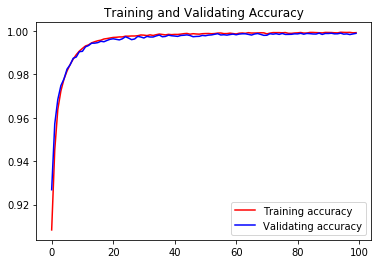

In [13]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [14]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_8_4_model.h5')